In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter, NullFormatter, FixedLocator, FixedFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.linewidth': 1.25})
plt.rcParams.update({'axes.labelpad': 5})

plt.rcParams.update({'xtick.major.size': 7.5})
plt.rcParams.update({'xtick.minor.size': 4.0})
plt.rcParams.update({'ytick.major.size': 7.5})
plt.rcParams.update({'ytick.minor.size': 4.0})

plt.rcParams.update({'xtick.major.width': 1.5})
plt.rcParams.update({'ytick.major.width': 1.5})
plt.rcParams.update({'xtick.minor.width': 1.0})
plt.rcParams.update({'ytick.minor.width': 1.0})

plt.rcParams.update({'xtick.major.pad': 5})
plt.rcParams.update({'ytick.major.pad': 5})

plt.rcParams.update({'xtick.top': True})
plt.rcParams.update({'ytick.right': True})
plt.rcParams.update({'xtick.labeltop': False})
plt.rcParams.update({'ytick.labelright': False})

plt.rcParams.update({'xtick.direction': "in"})
plt.rcParams.update({'ytick.direction': "in"})

In [4]:
def fline(x,a,b):
    """ Line given slope and intercept. """
    return a*x + b

In [5]:
def convert_wl(freq):
    return 29979245800.0/((freq+1e-30)*1e9)

def convert_freq(wl):
    return 29979245800.0/(wl+1e-30)*1e-9

In [6]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

interval  = np.linspace(-1.,3.,6)
cm        = plt.get_cmap('plasma') 
cNorm     = colors.Normalize(vmin=interval[0], vmax=interval[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

color1    = scalarMap.to_rgba(interval[1])
color2    = scalarMap.to_rgba(interval[3])
color3    = scalarMap.to_rgba(interval[4])

<IPython.core.display.Javascript object>


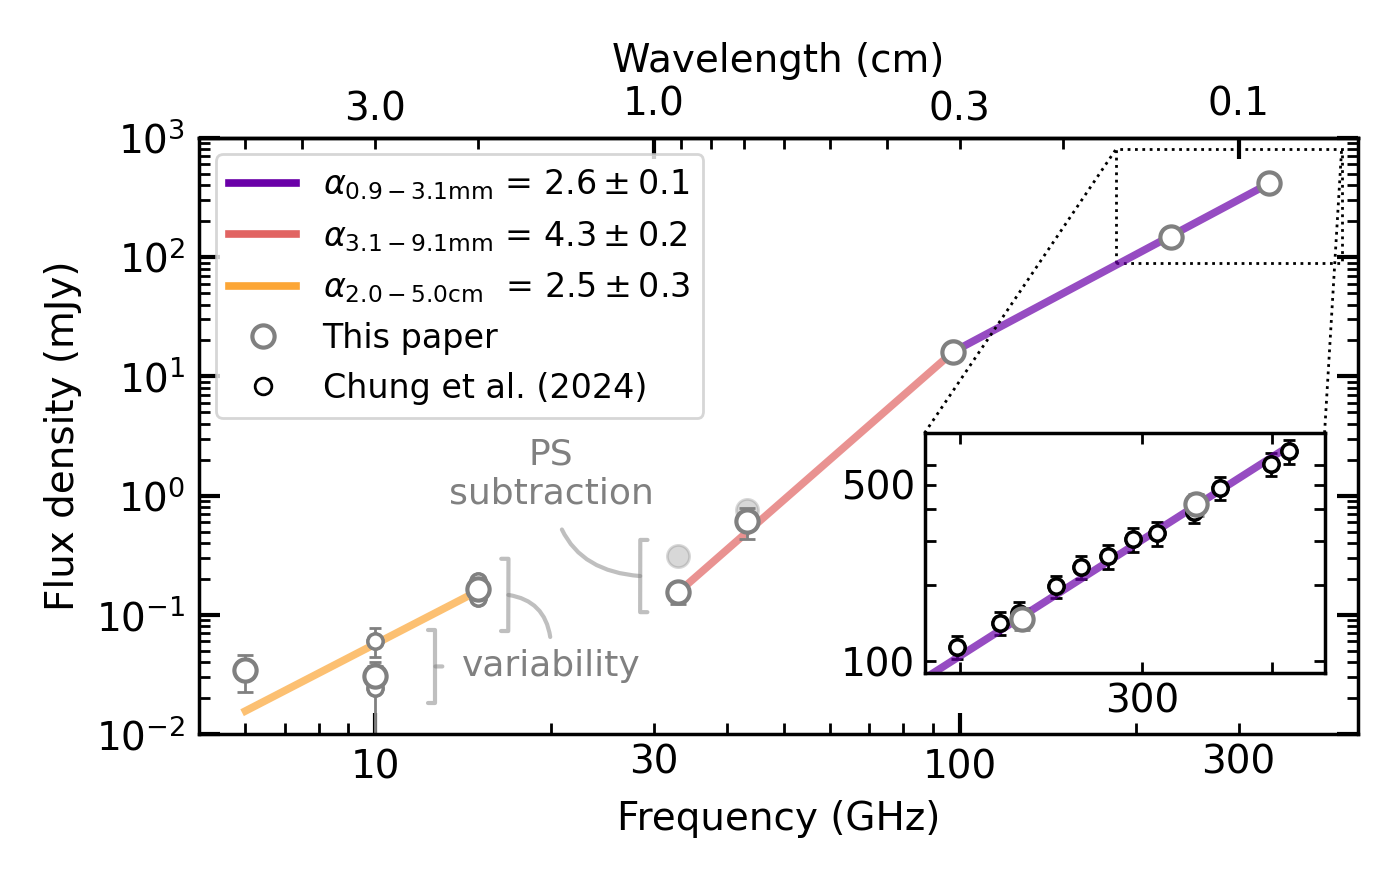

Percent of continuum contribution at C, X, and Ku Band freqs = [0.03220375 0.03028284 0.00301544]


In [7]:
#All values from uncertainty_CITau.py
fig, axs = plt.subplots(figsize=(7.0,4.4))

freq    = np.array([338.228  ,229.612  ,97.504  ,43.34  ,33.       ,15.       ,10.        ,6.         ])
flux    = np.array([418.98e-3,147.66e-3,16.33e-3,0.76e-3,0.31123e-3,0.16397e-3,0.030671e-3,0.034491e-3])*1e3
uncr    = np.array([1.36e-3  ,0.33e-3  ,0.25e-3 ,0.17e-3,0.02760e-3,0.00551e-3,0.006120e-3,0.011900e-3])*1e3
cal_err = np.array([0.10     ,0.10     ,0.05    ,0.10   ,0.10      ,0.05      ,0.05       ,0.05       ])
uncr    = np.hypot(uncr,cal_err*flux)

plt.errorbar(freq,flux,ls='none',lw=1,capsize=3,capthick=1,marker='o',ms=8,color='gray',alpha=0.3)

plt.errorbar([15, 15],[0.19291, 0.13863],[1.45e-02,1.24e-02],ls='none',lw=1,capsize=2,capthick=1,marker='o',ms=5.5,mew=1,color='gray') #max and min fluxes from tclean
plt.errorbar([15, 15],[0.19291, 0.13863],ls='none',lw=1,marker='o',ms=5.5,mew=1.25,color='gray',mfc='w',mec='gray',zorder=10)
plt.errorbar([10, 10],[0.06084, 0.02425],[1.64e-02,1.61e-02],ls='none',lw=1,capsize=2,capthick=1,marker='o',ms=5.5,mew=1,color='gray') #max and min fluxes from tclean
plt.errorbar([10, 10],[0.06084, 0.02425],ls='none',lw=1,marker='o',ms=5.5,mew=1.25,color='gray',mfc='w',mec='gray',zorder=10)

freq    = np.array([338.228  ,229.612  ,97.504    ,43.34  ,33.      ,15.       ,10.        ,6.         ])
flux    = np.array([418.98e-3,147.66e-3,16.1058e-3,0.61e-3,0.1550e-3,0.16397e-3,0.030671e-3,0.034491e-3])*1e3
uncr    = np.array([1.36e-3  ,0.33e-3  ,0.25e-3   ,0.17e-3,0.0276e-3,0.00551e-3,0.006120e-3,0.011900e-3])*1e3
cal_err = np.array([0.10     ,0.10     ,0.05      ,0.10   ,0.10     ,0.05      ,0.05       ,0.05       ])
uncr    = np.hypot(uncr,cal_err*flux)

plt.errorbar(freq,flux,yerr=uncr,ls='none',lw=1,capsize=3,capthick=1,marker='o',ms=8,mew=1,color='gray',mfc='w',mec='gray',zorder=10)
plt.errorbar(freq,flux,ls='none',lw=1,marker='o',ms=8,mew=1.5,color='gray',mfc='w',mec='gray',zorder=10)

popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq[:3]), ydata=np.log10(flux[:3]), 
    sigma=uncr[:3]/flux[:3]/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
labelALMA = r'$\alpha_{\rm 0.9-3.1mm}$ = ' + f'${{{popt[0]:3.1f}}} \pm {{{perr[0]:3.1f}}}$'

plt.loglog(
    freq[:3],10.**fline(np.log10(freq[:3]),*popt),lw=2.75,alpha=0.7,label=labelALMA,color=color1
)

popt, pcov = curve_fit(
    f=fline, xdata=[np.log10(freq[2]),np.log10(freq[4])], ydata=[np.log10(flux[2]),np.log10(flux[4])], 
    sigma=[uncr[2]/flux[2]/np.log(10),uncr[4]/flux[4]/np.log(10)], absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
labelVLA = r'$\alpha_{\rm 3.1-9.1mm}$ = ' + f'${{{popt[0]:3.1f}}} \pm {{{perr[0]:3.1f}}}$'

plt.loglog(
    [freq[2],freq[4]],
    10**fline(np.array([np.log10(freq[2]),np.log10(freq[4])]),*popt),lw=2.75,alpha=0.7,
    label=labelVLA,color=color2
)

print('Percent of continuum contribution at C, X, and Ku Band freqs = {}'.format(10**fline(np.log10(freq[-3:]),*popt)/flux[-3:]))
      
popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq[-3:]), ydata=np.log10(flux[-3:]), 
    sigma=uncr[-3:]/flux[-3:]/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
labelFF = r'$\alpha_{\rm 2.0-5.0cm}$  = ' + f'${{{popt[0]:3.1f}}} \pm {{{perr[0]:3.1f}}}$'

plt.loglog(
    freq[-3:],10**fline(np.log10(freq[-3:]),*popt),lw=2.75,alpha=0.7,label=labelFF,color=color3
)

# A bit of cosmetics
axs.set_xlabel(r'Frequency (GHz)')
axs.set_ylabel(r'Flux density (mJy)')

axs.xaxis.set_minor_locator(FixedLocator([6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300]))
axs.xaxis.set_minor_formatter(FixedFormatter(['','','','','','30','','','','','','','','300']))

axs.set_xticks([10,100],['10','100'])
axs.get_xaxis().set_major_formatter(ScalarFormatter())

axs.tick_params(axis='x',which='both',top=False,labeltop=False)

secax = axs.secondary_xaxis('top', functions=(convert_wl,convert_freq))

secax.xaxis.set_minor_locator(FixedLocator([5,4,3,2,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]))
secax.xaxis.set_minor_formatter(FixedFormatter(['','','3.0','','','','','','','','0.3','','']))
secax.set_xticks([0.1,1],['0.1','1'])
secax.get_xaxis().set_major_formatter(ScalarFormatter())

secax.set_xlabel(r'Wavelength (cm)')

axs.set_xlim(5,480)
axs.set_ylim(1e-2,1e3)

fig.tight_layout()

#Plot insert with the Chung et al. (2024) data
axin = inset_axes(
    axs, 
    width  = 2.0,
    height = 1.2,
    loc    = 'upper right',
    bbox_to_anchor=[0.79,0.42,0.17,0.11], 
    bbox_transform=axs.figure.transFigure
)

mark_inset(axs, axin, loc1=2, loc2=1, ls=':', ec='k')

flux_sean = np.array([114.0, 142.1, 156.0, 198.0, 237.2, 260.5, 303.9, 320.9, 390.8, 485.1, 605.3, 679.4])
uncr_sean = np.array([11.8 ,  14.7,  16.0,  20.2,  25.1,  28.7,  32.2,  34.1,  39.4,  49.4,  62.6,  73.4]) #most likely already include 10% flux-calibration uncertainty (from comparison of Fig. 4 of Chung+24 and these points)
freq_sean = np.array([199  ,   219,   228,   248,   262,   278,    294,  310,   337,   357, 399.5, 415.5])

axin.errorbar(freq_sean,flux_sean,yerr=uncr_sean,ls='none',lw=1,capsize=2,capthick=1,marker='o',ms=5.5,mew=1,color='k',mfc='w',mec='k')
axin.errorbar(freq_sean,flux_sean,ls='none',lw=1,marker='o',ms=5.5,mew=1.25,color='k',mfc='w',mec='k',label='Chung et al. (2024)')

axin.errorbar(freq,flux,yerr=uncr,ls='none',lw=1,capsize=3,capthick=1,marker='o',ms=8,mew=1,color='gray',mfc='w',mec='gray')
axin.errorbar(freq,flux,ls='none',lw=1,marker='o',ms=8,mew=1.5,color='gray',mfc='w',mec='gray',label='This paper')

popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq[:3]), ydata=np.log10(flux[:3]), 
    sigma=uncr[:3]/flux[:3]/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))

axin.loglog(
    np.hstack((freq[2],freq_sean)),10.**fline(np.log10(np.hstack((freq[2],freq_sean))),*popt),color=color1,lw=2.75,alpha=0.7,
    # label=r'$\alpha_{\rm ALMA}$ = ' + f'${{{popt[0]:3.2f}}} \pm {{{perr[0]:3.2f}}}$'
)

axin.set_xlim(185,450)
axin.set_ylim( 90,800)

axin.set_xticks([],[])
axin.get_xaxis().set_major_formatter(ScalarFormatter())

# axin.tick_params(top=True, labeltop=True, bottom=True, labelbottom=False)

axin.xaxis.set_minor_locator(FixedLocator([200,300,400]))
axin.xaxis.set_minor_formatter(FixedFormatter(['','300','']))

axin.set_yticks([],[])
axin.get_yaxis().set_major_formatter(ScalarFormatter())

axin.yaxis.set_minor_locator(FixedLocator([100,200,300,400,500,600]))
axin.yaxis.set_minor_formatter(FixedFormatter(['100','','','','500','']))

legend_elements = [
    Line2D([0], [0], ls='-', color=color1, lw=2.75, label=labelALMA),
    Line2D([0], [0], ls='-', color=color2, lw=2.75, label=labelVLA),
    Line2D([0], [0], ls='-', color=color3, lw=2.75, label=labelFF),
    Line2D([0], [0], ls='none', marker='o', color='gray', ms=8, mfc='w', mec='gray', mew=1.50, label='This paper'),
    Line2D([0], [0], ls='none', marker='o', color='k', ms=6, mfc='w', mec='k', lw=1.25, label='Chung et al. (2024)'),
]

axs.legend(handles=legend_elements, loc='upper left',fontsize=12)

#Annotations
bracketstyle = f"-[, angleB=4"
axs.annotate(
    'PS\nsubtraction', xy=(30,0.21), xytext=(20,1.51), color='gray', fontsize=13,
    arrowprops=dict(arrowstyle=bracketstyle, connectionstyle='arc3,rad=0.5', lw=1.5, color='gray', alpha=0.5, 
                    shrinkA=5, shrinkB=5,),horizontalalignment="center", verticalalignment="center",
)

bracketstyle = f"-[, angleB=0"
axs.annotate(
    'variability', xy=(12,0.037), xytext=(20,0.037), color='gray', fontsize=13,
    arrowprops=dict(arrowstyle=bracketstyle, connectionstyle='arc3,rad=0.0', lw=1.5, color='gray', alpha=0.5, 
                    shrinkA=5, shrinkB=5,),horizontalalignment="center", verticalalignment="center",
)

bracketstyle = f"-[, angleB=8.5"
axs.annotate(
    '', xy=(16,0.15), xytext=(20,0.05), color='gray', fontsize=13,
    arrowprops=dict(arrowstyle=bracketstyle, connectionstyle='arc3,rad=0.5', lw=1.5, color='gray', alpha=0.5, 
                    shrinkA=5, shrinkB=5,),horizontalalignment="center", verticalalignment="center",
)

plt.savefig('spectral_distribution_sean.pdf',bbox_inches='tight')
plt.show()

In [8]:
color_list = ['#6b8ce6','#da70d6','#ff0000','#ffb255','#ffd800']

<IPython.core.display.Javascript object>


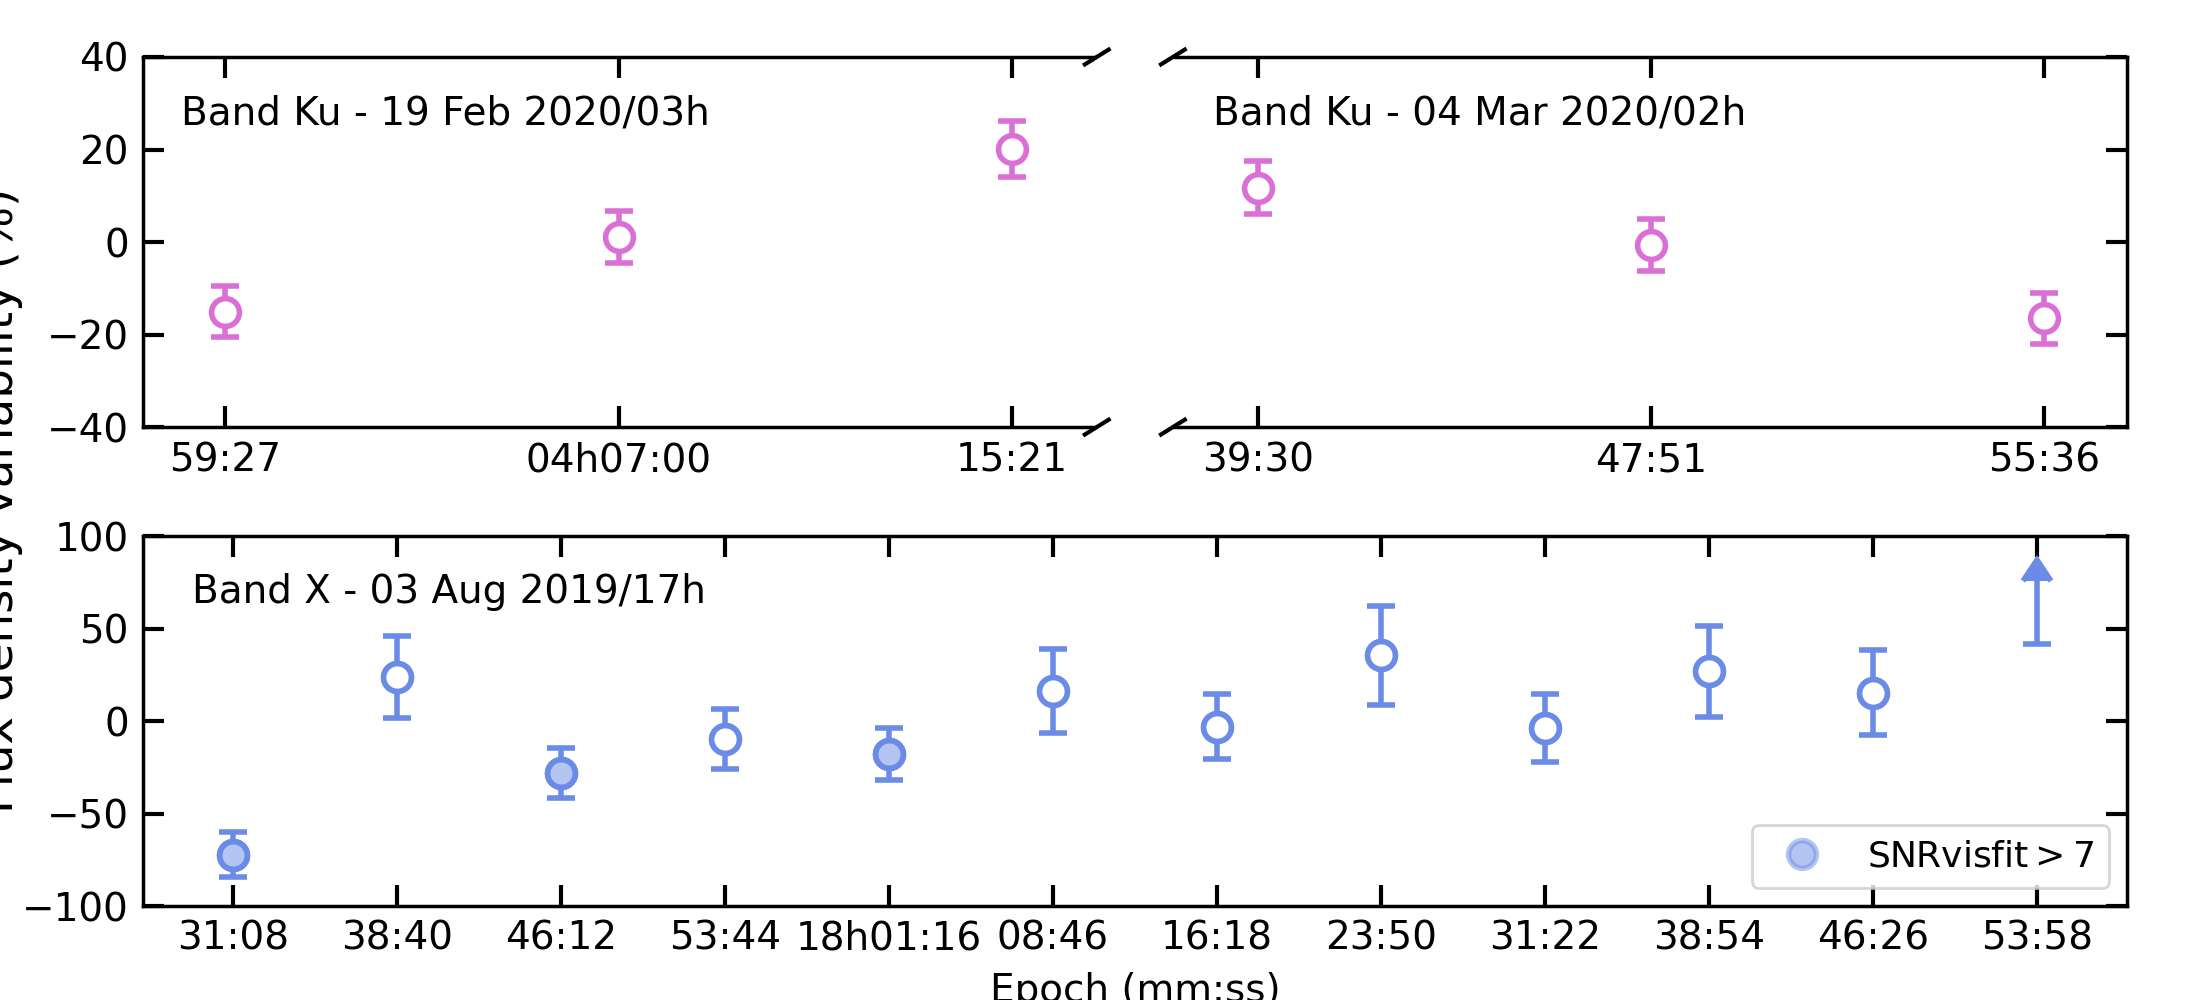

In [9]:
fig, axs = plt.subplots(2,1,figsize=(11,5))

fig.tight_layout()

centre   = gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=axs[0],wspace=0.085,hspace=0.1,width_ratios=[0.5,0.5])
axs_plot_feb = plt.subplot(centre[0])
axs_plot_mar = plt.subplot(centre[1])
d = .02

fluxKu_MCMC = 1e3*np.array([0.0001855899083792287 , 0.00015952218569129258, 0.00012884545725864852, 0.00014239214914870494, 0.000162260906178993  , 0.00018794061410890155]) #from MCMC visibility fitting
uncrKu_MCMC = 1e3*np.array([4.0581213495186844e-06, 3.7314939464445462e-06, 4.271661848352274e-06 , 3.718529242307064e-06 , 3.7902107359246307e-06, 3.8746915665557955e-06])
epochKu  = np.array(['59:27','04h07:00','15:21','39:30','47:51','55:36'])
uncrKu   = np.hypot(0.05*fluxKu_MCMC,uncrKu_MCMC)

flux_SNR = fluxKu_MCMC/uncrKu_MCMC
# print(flux_SNR)

# PS flux (from MCMC) = 0.16129494 mJy
# PS minu (from MCMC) = 0.15965172 mJy
# PS maxu (from MCMC) = 0.16283328 mJy

uncr_std = np.hypot(0.00164322,0.16129494*0.05) #from MCMC visibility fitting

varKu    = (1 - fluxKu_MCMC/0.16129494)*100.
uvarKu   = np.hypot(uncrKu_MCMC/fluxKu_MCMC,uncr_std/0.16129494)*100.

fluxX_MCMC = 1e3*np.array([5.587584753900106e-05 , 2.4721300665501183e-05, 4.158373961455338e-05 , 3.564147742358324e-05, 3.824354520707033e-05, 2.7166676337612953e-05, 3.347257014353673e-05, 2.090623647069995e-05, 3.3692701679082116e-05, 2.372383958480851e-05, 2.748699325721361e-05, 7.989030880863116e-06])
uncrX_MCMC = 1e3*np.array([5.6538879927731664e-06, 5.254460612804816e-06 , 4.9842641531179635e-06, 5.277436761919729e-06, 4.825633160771509e-06, 5.886762148454557e-06 , 5.467331075440128e-06, 5.431859123492429e-06, 5.696105141543944e-06 , 5.610317324608849e-06, 6.014265194502653e-06, 6.287914901003289e-06])
epochX   = np.array(['31:08','38:40','46:12','53:44','18h01:16','08:46','16:18','23:50','31:22','38:54','46:26','53:58'])
uncrX    = np.hypot(0.00*fluxX_MCMC,uncrX_MCMC)

peak_SNR = np.array([6.76,2.96,6.07,4.43,4.18,3.62,3.96,3.16,3.58,3.17,3.46,3.94])
flux_SNR = fluxX_MCMC/uncrX_MCMC
# print(flux_SNR)

fluxX_MCMC[flux_SNR<3] = 3*uncrX_MCMC[flux_SNR<3]

# PS flux (from MCMC) = 0.03246430 mJy
# PS minu (from MCMC) = 0.03390717 mJy
# PS maxu (from MCMC) = 0.03104670 mJy

uncr_std = np.hypot(0.00144287,0.03246430*0.05)

varX     = (1 - fluxX_MCMC/0.03246430)*100
uvarX    = np.hypot(uncrX_MCMC/fluxX_MCMC,uncr_std/0.03246430)*100
  
axs_plot_feb.errorbar(
    np.arange(len(varKu[:3])),varKu[:3],yerr=uvarKu[:3],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc='w',mew=2,c=color_list[1],zorder=10
)
axs_plot_mar.errorbar(
    np.arange(len(varKu[3:])),varKu[3:],yerr=uvarKu[3:],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc='w',mew=2,c=color_list[1],zorder=10
)
# axs[1].errorbar(
#     np.arange(len(varX)),varX,yerr=uvarX,ls='none',marker='o',lw=2,
#     capsize=5,capthick=1,ms=10,mfc='w',mew=2,c=color_list[0],zorder=10
# )
# axs[1].errorbar(
#     np.arange(len(varX))[flux_SNR>3],varX[flux_SNR>3],ls='none',marker='o',lw=2,
#     capsize=5,capthick=1,ms=10,mfc=color_list[0],mew=2,c=color_list[0],zorder=10,alpha=0.5,label=r'${\rm Peak}\ {\rm SNR}>3$'
# )
# axs[1].legend(loc='lower right',fontsize=13)
axs[1].errorbar(
    np.arange(len(varX))[flux_SNR<3],varX[flux_SNR<3],yerr=uvarX[flux_SNR<3],ls='none',marker='.',lw=2,
    capsize=5,capthick=1,ms=0,mfc='w',mew=2,c=color_list[0],zorder=10,lolims=True
)
axs[1].errorbar(
    np.arange(len(varX))[flux_SNR>3],varX[flux_SNR>3],yerr=uvarX[flux_SNR>3],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc=color_list[0],mew=2,c=color_list[0],zorder=10
)
axs[1].errorbar(
    np.arange(len(varX))[flux_SNR>3],varX[flux_SNR>3],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc='w',mew=2,c=color_list[0],zorder=10
)
axs[1].errorbar(
    np.arange(len(varX))[flux_SNR>7],varX[flux_SNR>7],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc=color_list[0],mew=2,c=color_list[0],zorder=10,alpha=0.5,label=r'${\rm SNR visfit}>7$'
)
axs[1].legend(loc='lower right',fontsize=13)

axs_plot_feb.set_ylim(-40,40)
axs_plot_mar.set_ylim(-40,40)
axs_plot_feb.set_xlim(-0.21,2.21)
axs_plot_mar.set_xlim(-0.21,2.21)
axs[1].set_ylim(-100,100)
axs[1].set_xlim(-0.55,11.55)

axs[1].set_xlabel('Epoch (mm:ss)')

axs_plot_feb.set_xticks([0,1,2],epochKu[:3])
axs_plot_mar.set_xticks([0,1,2],epochKu[3:])
axs[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],epochX)

axs_plot_feb.spines.right.set_visible(False)
axs_plot_mar.spines.left.set_visible(False)
axs_plot_feb.yaxis.tick_left()
axs_plot_mar.tick_params(which='both',left=False,labelleft=False)

kwargs = dict(transform=axs_plot_feb.transAxes, color='k', clip_on=False)
axs_plot_feb.plot((1.01 -d, 1.01 +0.25*d), (  -d,   +d), **kwargs)
axs_plot_feb.plot((1.01 -d, 1.01 +0.25*d), (1 -d, 1 +d), **kwargs)
kwargs.update(transform=axs_plot_mar.transAxes)
axs_plot_mar.plot((0.005 -d, 0.005 +0.25*d), (1 -d, 1 +d), **kwargs)
axs_plot_mar.plot((0.005 -d, 0.005 +0.25*d), (  -d,   +d), **kwargs)

axs_plot_feb.text(
        0.04, 0.90, r'{}'.format('Band Ku - 19 Feb 2020/03h'),   
        ha = 'left', va = 'top', transform = axs_plot_feb.transAxes, 
        #bbox = dict(boxstyle="round", ec="w", fc="k"),
        color = 'k', fontsize = 14,
    )

axs_plot_mar.text(
        0.04, 0.90, r'{}'.format('Band Ku - 04 Mar 2020/02h'),   
        ha = 'left', va = 'top', transform = axs_plot_mar.transAxes, 
        #bbox = dict(boxstyle="round", ec="w", fc="k"),
        color = 'k', fontsize = 14,
    )

axs[1].text(
        0.025, 0.90, r'{}'.format('Band X - 03 Aug 2019/17h'),   
        ha = 'left', va = 'top', transform = axs[1].transAxes, 
        #bbox = dict(boxstyle="round", ec="w", fc="k"),
        color = 'k', fontsize = 14,
    )

fig.supylabel('Flux density variability (%)', x=-0.01)

plt.savefig('variability_pp_XKu_preselfcal_visibilities.pdf',bbox_inches='tight')
plt.show()